In [1]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
audio_data = 'C:/Users/b.smadiarov/projects/EvaluateKazakhSpeech/data/raw/TIMIT/TRAIN/DR1/FCJF0/SA1.wav'
y, sr = librosa.load(audio_data)
print(type(y), type(sr))

<class 'numpy.ndarray'> <class 'int'>


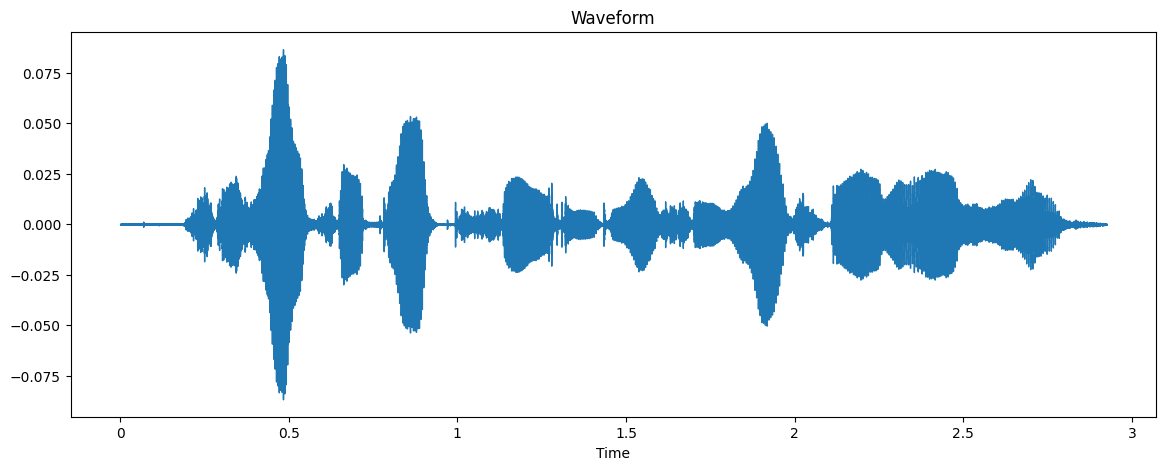

In [3]:
import IPython.display as ipd
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()
ipd.Audio(y, rate=sr)

Text(0.5, 1.0, 'Harmonic + Percussive')

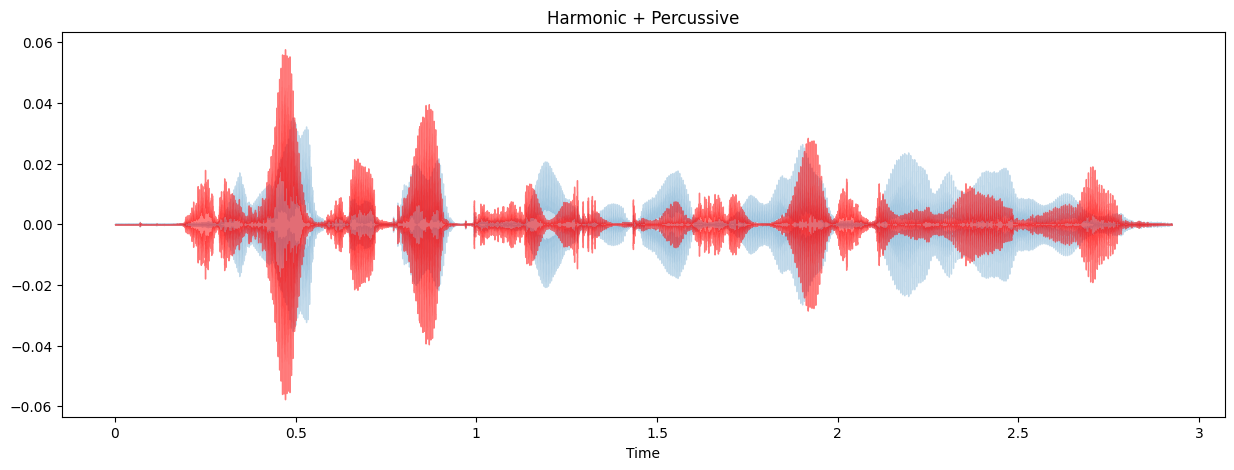

In [5]:
# Seperation of Harmonic and Percussive Signals
y_harmonic, y_percussive = librosa.effects.hpss(y)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

Обнаруженный темп: [135.99917763] ударов в минуту


[[Text(0, 0, ''), Text(1, 0, '')]]

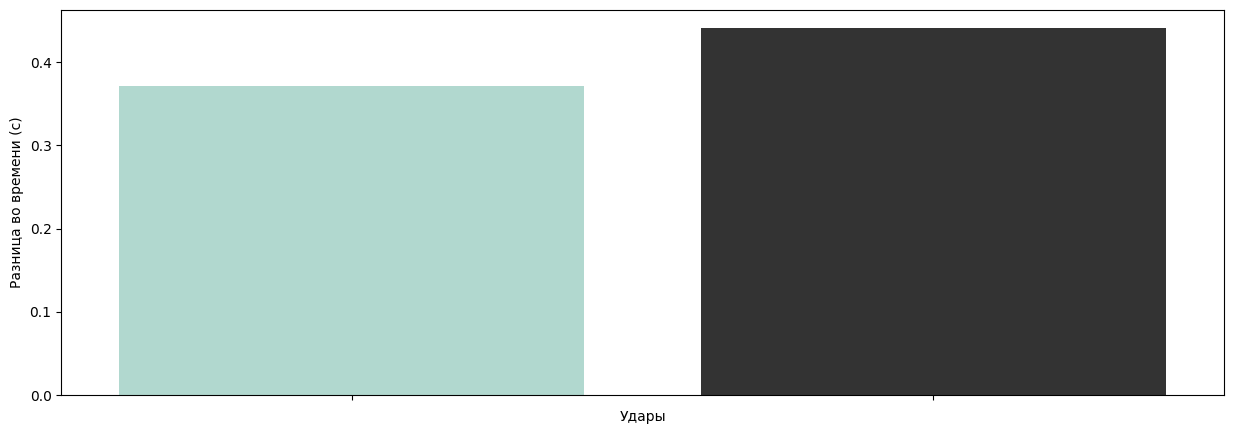

In [8]:
# Предполагается, что y_percussive и sr уже определены
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
print('Обнаруженный темп: ' + str(tempo) + ' ударов в минуту')

beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff = np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Разница во времени (с)")
ax.set_xlabel("Удары")

# Назначаем переменную `x` в качестве `hue` и убираем легенду
g = sns.barplot(x=beat_nums, y=beat_time_diff, palette="BuGn_d", hue=beat_nums, legend=False, ax=ax)
g.set(xticklabels=[])

c:\users\b.smadiarov\appdata\local\programs\python\python39\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1008
  warnings.warn(


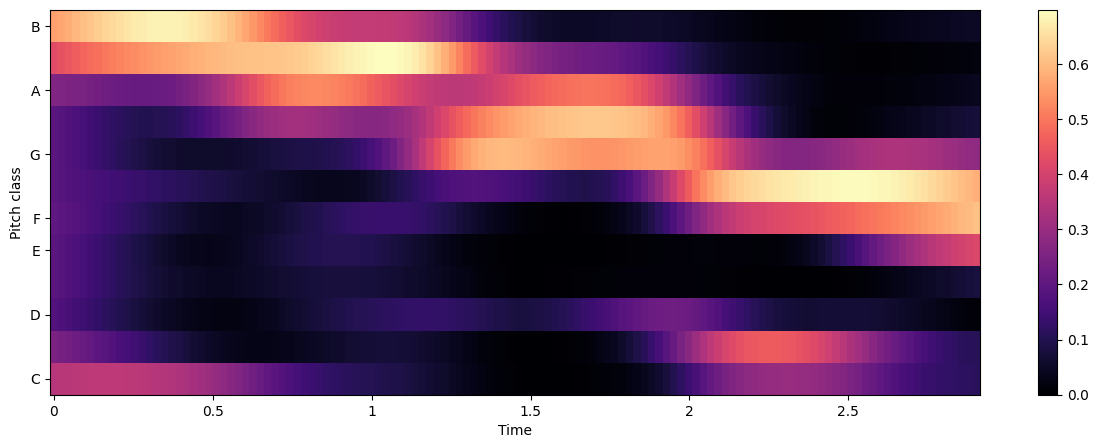

In [9]:
#Chroma Energy Normalized (CENS)
chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()

Text(0.5, 1.0, 'MFCC')

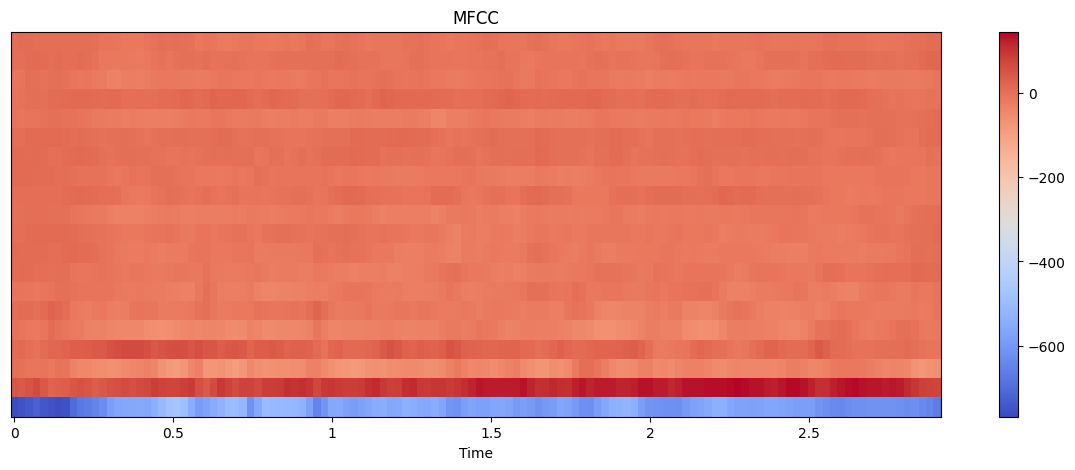

In [10]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

In [11]:
mfccs

array([[-768.3544   , -750.7759   , -742.4737   , ..., -633.60535  ,
        -645.15784  , -665.4505   ],
       [  46.73099  ,   40.856964 ,   48.584663 , ...,   81.77198  ,
          78.47355  ,   76.47226  ],
       [   1.2454944,   -2.6173027,   -5.0656576, ...,  -74.72945  ,
         -68.58215  ,  -59.22175  ],
       ...,
       [ -10.464642 ,   -6.9370294,    2.224483 , ...,  -16.234732 ,
         -13.598282 ,   -8.058502 ],
       [   3.3576438,    4.6636486,    8.0523615, ...,   11.67152  ,
          17.768679 ,   17.485226 ],
       [   5.1522717,    5.819708 ,    6.024295 , ...,    5.173408 ,
           8.326227 ,    5.972117 ]], dtype=float32)

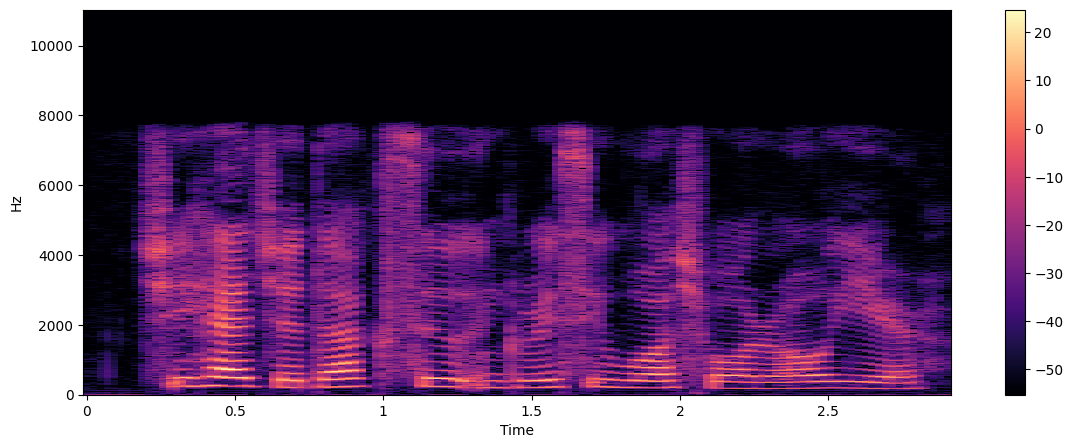

In [41]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

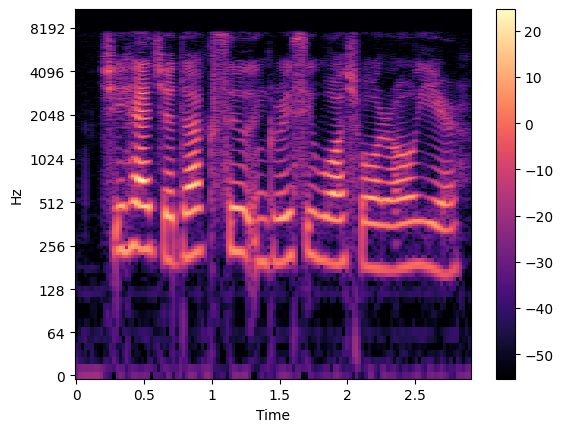

In [42]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

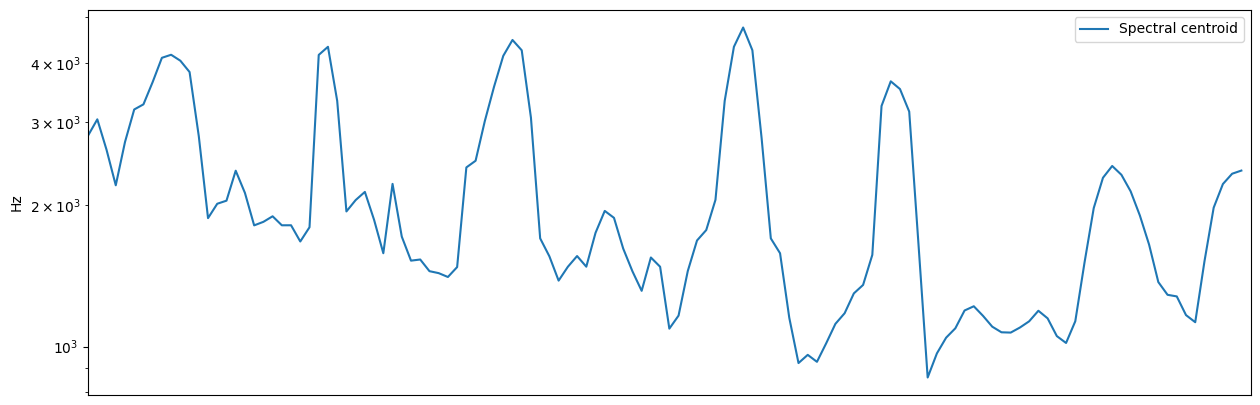

In [14]:
# Spectral Centroid
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

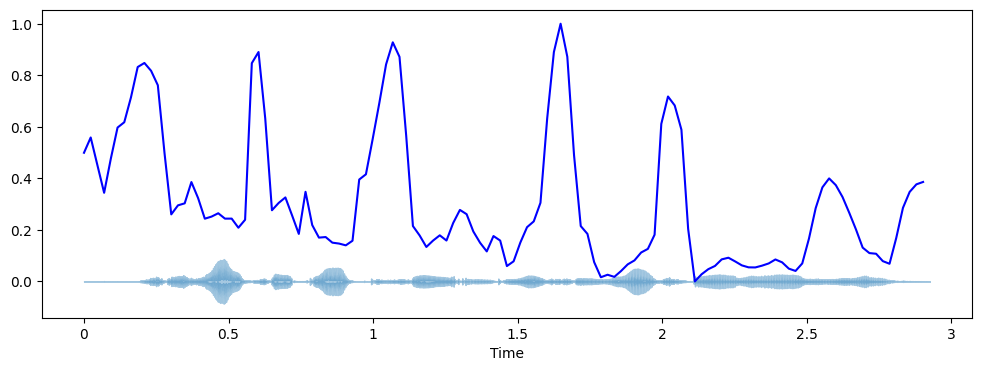

In [18]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

Text(0.5, 1.0, 'Spectral contrast')

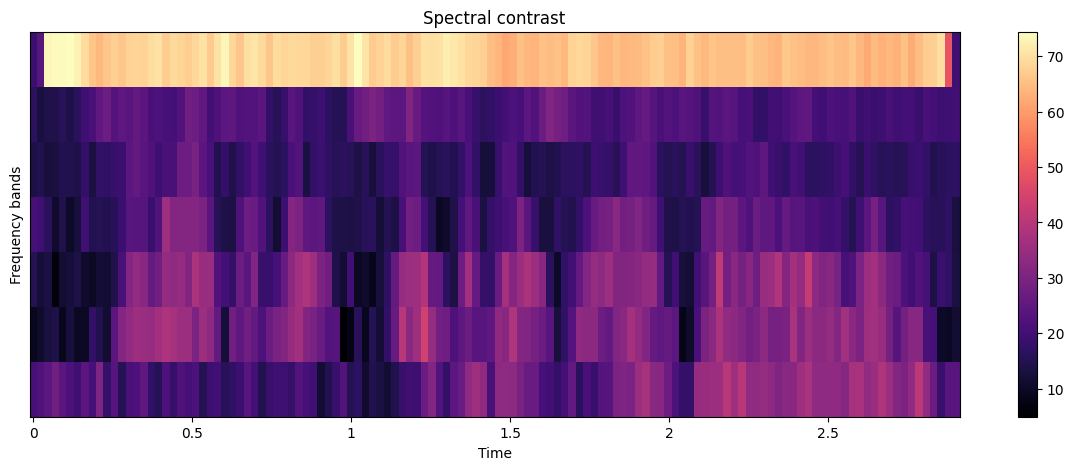

In [19]:
# Spectral Contrast
contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')

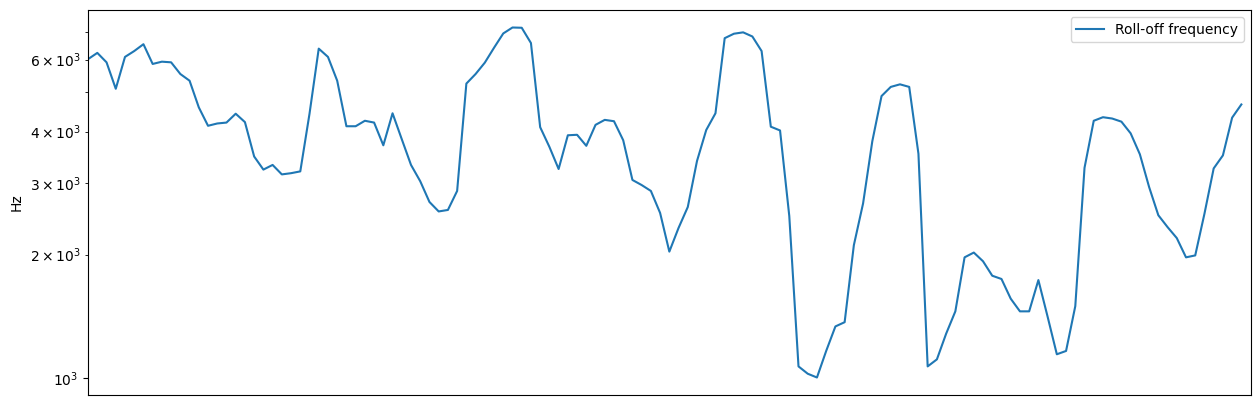

In [21]:
# Spectral Rolloff
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

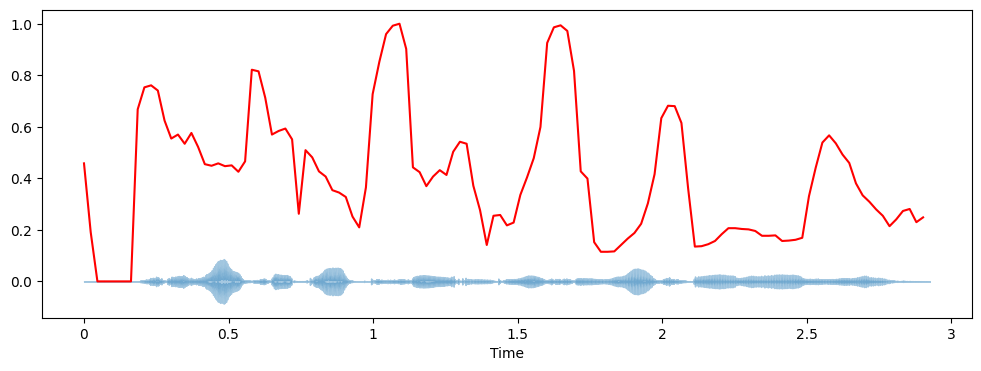

In [24]:
spectral_rolloff = librosa.feature.spectral_rolloff(y = y+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

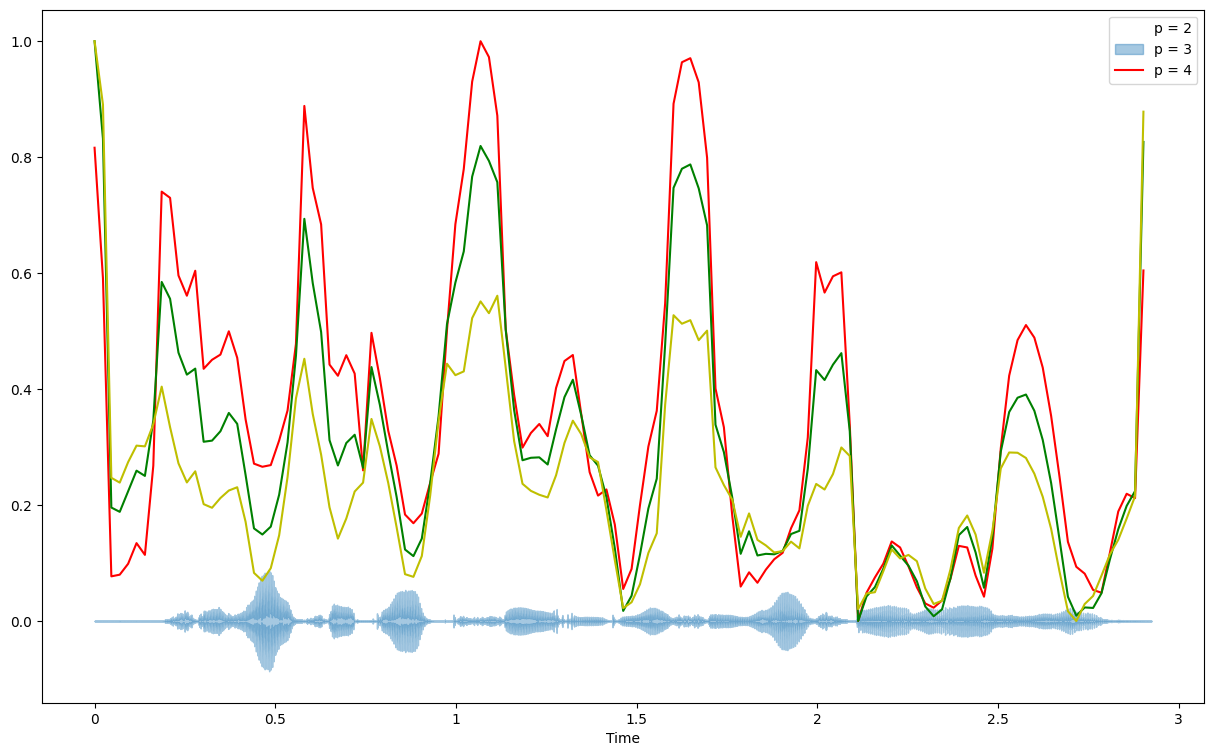

In [26]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

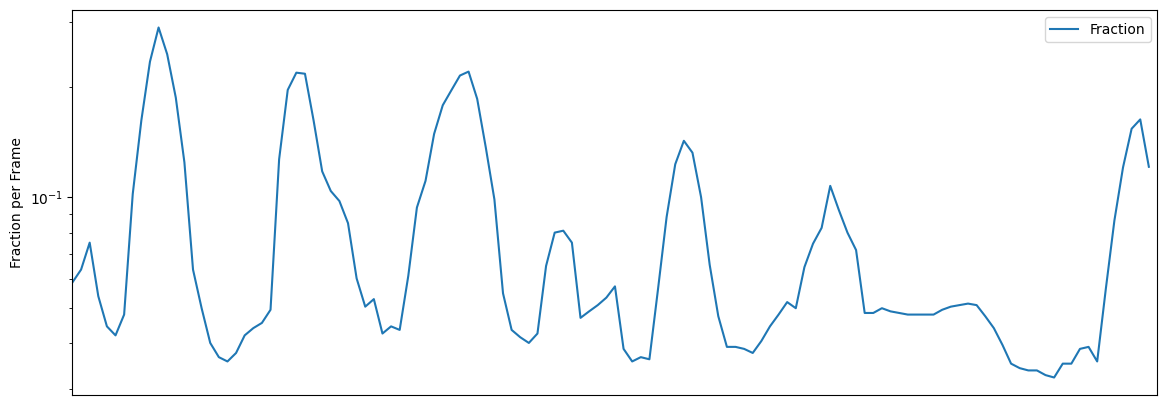

In [27]:
# Zero Crossing Rate
zrate=librosa.feature.zero_crossing_rate(y_harmonic)
plt.figure(figsize=(14,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

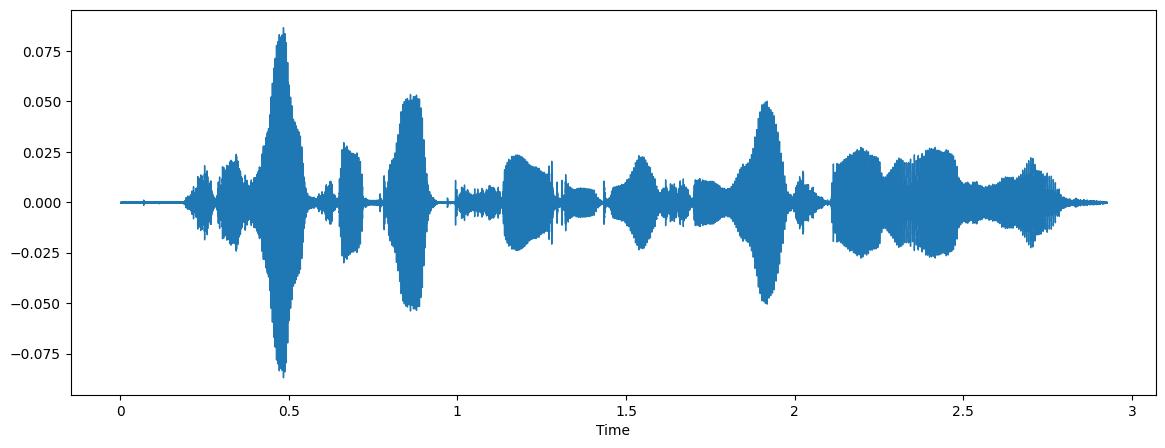

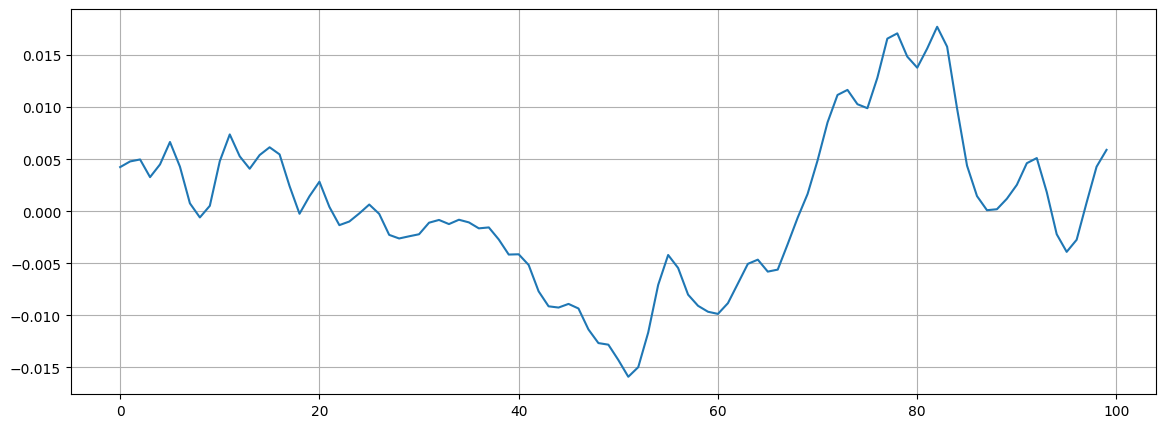

In [29]:
# Построение графика сигнала:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
# Увеличение масштаба:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()

In [30]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

10


In [32]:
# ---------------------------------------------
# PART 2

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,mfccs_std_10,mfccs_std_11,mfccs_std_12,mfccs_std_13,mfccs_std_14,mfccs_std_15,mfccs_std_16,mfccs_std_17,mfccs_std_18,mfccs_std_19
0,-589.949341,99.656792,-45.251217,21.704647,-31.600569,-16.581991,-16.572718,-11.686224,-13.619763,-9.447892,...,8.99127,8.409348,7.819092,5.546741,5.49209,9.145704,6.656447,6.704576,6.877051,6.311709


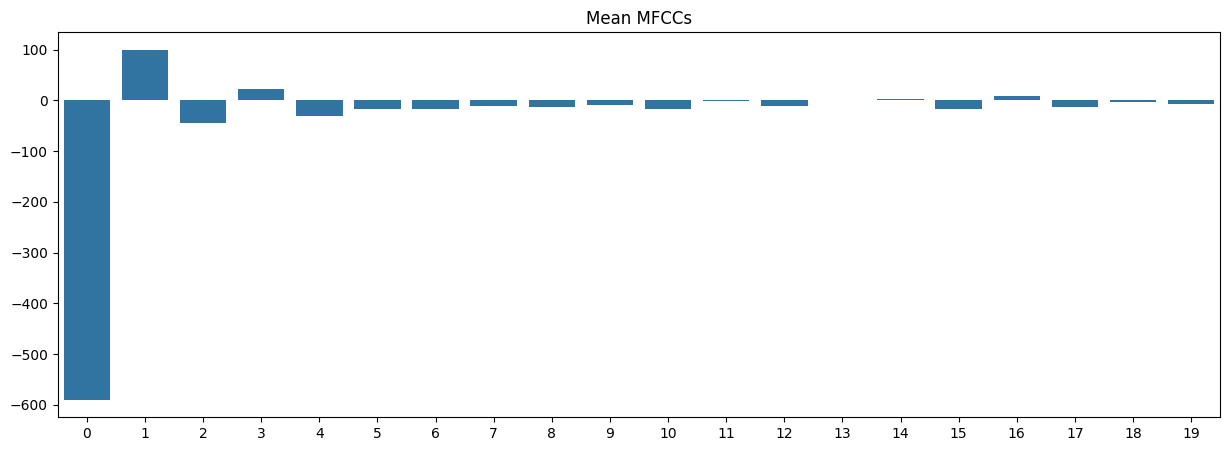

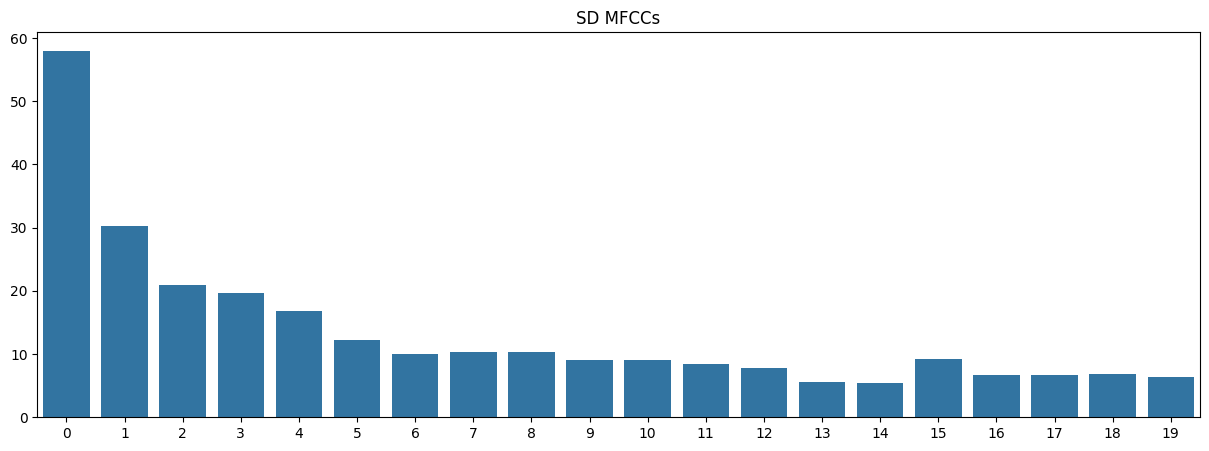

In [33]:
# Feature Generation
# MFCCs
mfccs_mean=np.mean(mfccs,axis=1)
mfccs_std=np.std(mfccs,axis=1)

coeffs=np.arange(0,20)
plt.figure(figsize=(15,5))
plt.title('Mean MFCCs')
sns.barplot(x=coeffs,y=mfccs_mean)

plt.figure(figsize=(15,5))
plt.title('SD MFCCs')
sns.barplot(x=coeffs,y=mfccs_std)
# Generate the chroma Dataframe
mfccs_df=pd.DataFrame()
for i in range(0,20):
    mfccs_df['mfccs_mean_'+str(i)]=mfccs_mean[i]
for i in range(0,20):
    mfccs_df['mfccs_std_'+str(i)]=mfccs_mean[i]
mfccs_df.loc[0]=np.concatenate((mfccs_mean,mfccs_std),axis=0)
mfccs_df

In [34]:
# Spectral Features
# Spectral Centroid

cent_mean=np.mean(cent)
cent_std=np.std(cent)
cent_skew=scipy.stats.skew(cent,axis=1)[0]
print('Mean: '+str(cent_mean))
print('SD: '+str(cent_std))
print('Skewness: '+str(cent_skew))

Mean: 2055.4204741619014
SD: 976.128028322608
Skewness: 1.069625894697771


In [35]:
# Spectral Rolloff
rolloff_mean=np.mean(rolloff)
rolloff_std=np.std(rolloff)
rolloff_skew=scipy.stats.skew(rolloff,axis=1)[0]
print('Mean: '+str(rolloff_mean))
print('SD: '+str(rolloff_std))
print('Skewness: '+str(rolloff_skew))

Mean: 3762.24365234375
SD: 1681.7714879050527
Skewness: 0.21324826272174127


In [ ]:
# Извлечение признаков

In [36]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pathlib
import csv


import warnings
warnings.filterwarnings('ignore')

In [37]:
def extract_features(directory, file):
    name = f'{directory}/{file}'
    y, sr = librosa.load(name, mono=True, duration=5)
    
    features = [] 
    features.append(file) # filename
    features.extend([np.mean(e) for e in librosa.feature.mfcc(y=y, sr=sr, 
                                                              n_mfcc=20)])  # mfcc_mean<0..20>
    features.extend([np.std(e) for e in librosa.feature.mfcc(y=y, sr=sr,
                                                             n_mfcc=20)])   # mfcc_std
    features.append(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T,
                            axis = 0)[0])     # cent_mean
    features.append(np.std(librosa.feature.spectral_centroid(y=y,sr=sr).T,
                           axis = 0)[0])       # cent_std
    features.append(scipy.stats.skew(librosa.feature.spectral_centroid(y=y,sr=sr).T,
                                     axis = 0)[0])    # cent_skew
    features.append(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, 
                            axis = 0)[0])      # rolloff_mean
    features.append(np.std(librosa.feature.spectral_rolloff(y=y, sr=sr).T, 
                           axis = 0)[0])       # rolloff_std
    

    features.append(directory.split('/')[-1])
    return features

In [47]:
training_path = 'C:\\Users\\b.smadiarov\\projects\\EvaluateKazakhSpeech\\data\\raw\\TIMIT\\TRAIN'.replace('\\', '/')
test_path = 'C:\\Users\\b.smadiarov\\projects\\EvaluateKazakhSpeech\\data\\raw\\TIMIT\\TEST'.replace('\\', '/')

In [48]:
#Cписки файлов
human_dir, _, human_files = next(os.walk(training_path))
spoof_dir, _, spoof_files = next(os.walk(test_path))
print(f"Human files: {len(human_files)}\nSpoof files: {len(spoof_files)}")

Human files: 0
Spoof files: 0
